In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

In [ ]:
image_path = '/content/satelliteimagerydatafile.png'
image = cv2.imread(image_path)

In [ ]:
# Resize the image to a desired size
resized_image = cv2.resize(image, (298, 954))

# Convert the image to grayscale
gray_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)

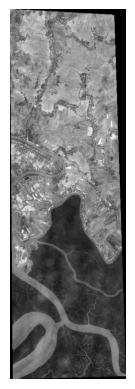

In [ ]:
# Display the grayscale image
plt.imshow(gray_image, cmap='gray')
plt.axis('off')
plt.show()

In [ ]:
height, width, channels = image.shape
pixel_values = image.flatten()

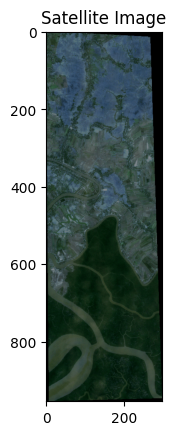

In [ ]:
plt.imshow(image)
plt.title('Satellite Image')
plt.show()

In [ ]:
mask = np.zeros(image.shape[:2], np.uint8)

# Define the rectangular region of interest (ROI) containing the foreground object
rect = (50, 50, 200, 400)  # Adjust the values based on the specific region you want to segment

# Perform GrabCut segmentation
bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)
iterations = 5  # Adjust the number of iterations based on the desired segmentation accuracy

cv2.grabCut(image, mask, rect, bgdModel, fgdModel, iterations, cv2.GC_INIT_WITH_RECT)

# Create a mask where the probable foreground and the definite foreground are combined
mask_final = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')

# Apply the mask to the original image to extract the foreground
segmented_img = image * mask_final[:, :, np.newaxis]

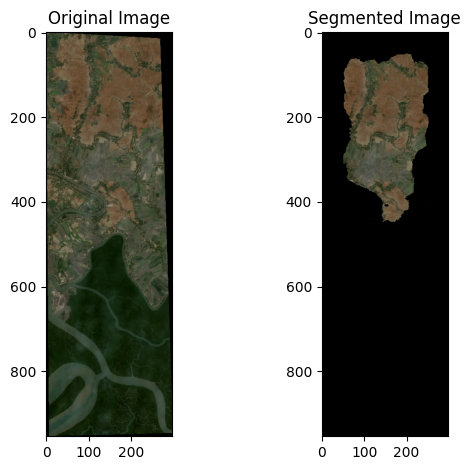

In [ ]:
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(segmented_img, cv2.COLOR_BGR2RGB))
plt.title('Segmented Image')

plt.tight_layout()
plt.show()

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
augmentation_generator = ImageDataGenerator(
    rotation_range=20,  # Rotate the image by up to 20 degrees
    width_shift_range=0.1,  # Shift the image horizontally by up to 10% of its width
    height_shift_range=0.1,  # Shift the image vertically by up to 10% of its height
    shear_range=0.2,  # Apply shearing transformation
    zoom_range=0.2,  # Apply random zooming
    horizontal_flip=True,  # Flip the image horizontally
    vertical_flip=True  # Flip the image vertically
)

In [ ]:
img = image.reshape((1,) + image.shape)

In [ ]:
augmented_images = augmentation_generator.flow(img, batch_size=1)

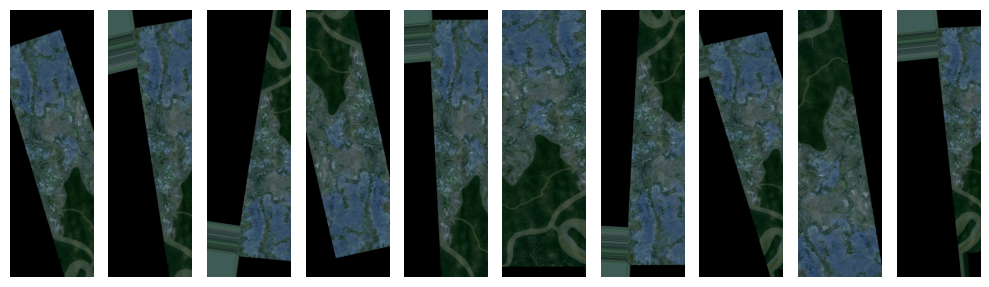

In [ ]:
num_augmented_images = 10 # Number of augmented images to display

plt.figure(figsize=(10, 10))

for i in range(num_augmented_images):
    augmented_img = augmented_images.next()[0].astype('uint8')
    plt.subplot(1, num_augmented_images, i+1)
    plt.imshow(augmented_img)
    plt.axis('off')

plt.tight_layout()
plt.show()